# Data Analysis

+ The csv files are generated and stored in the **Version 2** directory
+ Files are named after the seed that generated them *(will add the settings into the name too at a later point)*

### Libraries:
+ Pandas for importing managing the data in dataframes
+ Seaborn for visualising the data and generating plots
+ *Numpy may also be needed*
+ Pyplot to show plots

In [40]:
import pandas as pd 
# import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(16,9)})

preset = "US-2007"
# preset = "US-2020"
# preset = "EU-2016"

### Importing the data

+ The ```seed_number``` variable holds the seed to load data from

In [42]:
def getDF(seed_number):
    filepath = '../Version 2/seed-' + str(seed_number) + '-' + preset + '.csv'
    df = pd.read_csv(filepath)
    return df

def getVerboseDF(seed_number):
    filepath = '../Version 2/verbose-' + str(seed_number) + '-' + preset + '.csv'
    df = pd.read_csv(filepath)
    return df

def getSum(df, tick, carbon, electricity):
    types = ['COAL', 'GAS', 'NUCLEAR', 'WIND']
    for fuel in types:
        carbon.at[tick, fuel] = df.loc[(df['Tick'] == tick) & (df['Type'] == fuel) , 'Carbon'].sum() 
        electricity.at[tick, fuel] = df.loc[(df['Tick'] == tick) & (df['Type'] == fuel) , 'Electricity'].sum()
    return carbon, electricity

def cleanVerbose(df):
    carbon = pd.DataFrame()
    electricity = pd.DataFrame()
    for idx in range(1,df['Tick'].max()):
        carbon, electricity = getSum(df, idx, carbon, electricity)
    return carbon, electricity

        

In [15]:
def plotDF(df):
    sns.scatterplot(data=df, x="Tick", y="MoneyTotal")

def getCandEPlots(seed):
    carbon, electricity = cleanVerbose(getVerboseDF(seed))
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(data=carbon, ax=ax[0]).set_title("CO2")
    sns.lineplot(data=electricity, ax=ax[1]).set_title("Electricty")
    return fig

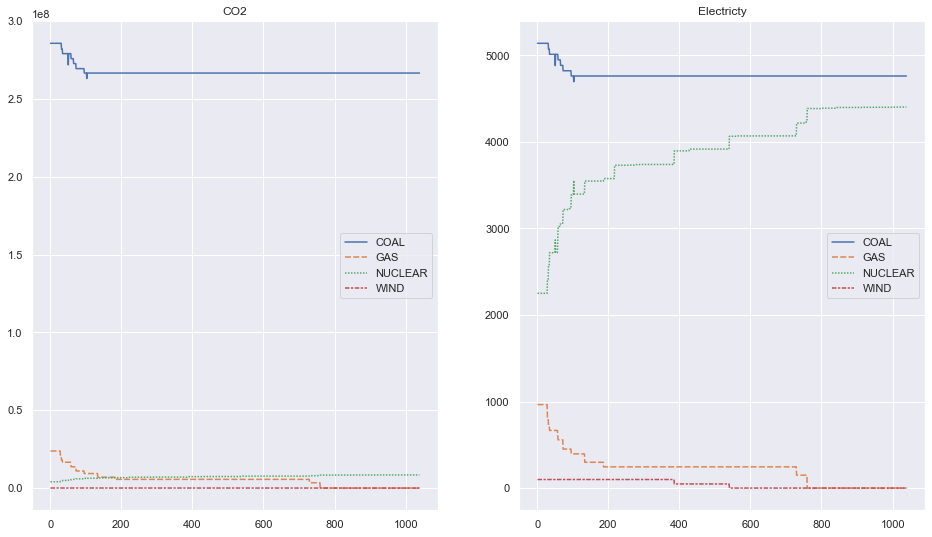

In [46]:
fig = getCandEPlots(31)

In [36]:
carbon, electricity = cleanVerbose(getVerboseDF(31))
carbon.head(100)

,COAL,GAS,NUCLEAR,WIND
1,131481984.3,62369706.06,6340849.1,927652.7456
2,131481984.3,62369706.06,6340849.1,927652.7456
3,131481984.3,62369706.06,6340849.1,927652.7456
4,131481984.3,62369706.06,6340849.1,927652.7456
5,131481984.3,62369706.06,6340849.1,927652.7456
...,...,...,...,...
96,131481984.3,62369706.06,6340849.1,927652.7456
97,131481984.3,62369706.06,6340849.1,927652.7456
98,131481984.3,62369706.06,6340849.1,927652.7456
99,131481984.3,62369706.06,6340849.1,927652.7456


In [37]:
electricity.head(100)

,COAL,GAS,NUCLEAR,WIND
1,2365.938836,2547.21779,3548.08679,3097.415273
2,2365.938836,2547.21779,3548.08679,3097.415273
3,2365.938836,2547.21779,3548.08679,3097.415273
4,2365.938836,2547.21779,3548.08679,3097.415273
5,2365.938836,2547.21779,3548.08679,3097.415273
...,...,...,...,...
96,2365.938836,2547.21779,3548.08679,3097.415273
97,2365.938836,2547.21779,3548.08679,3097.415273
98,2365.938836,2547.21779,3548.08679,3097.415273
99,2365.938836,2547.21779,3548.08679,3097.415273
